# Checking the metadata beloning to the MIR and WSI datasets

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
path = "/home/borbende/multimodal_CRC_dataset/"

dfs = []
for i in range(1,10):
    frame = pd.read_csv(f"{path}TMA{i}/TMA{i}_core_metadata.csv")
    frame["tma"] = i
    dfs.append(frame)
    
df = pd.concat(dfs, ignore_index = True)
print(df.shape)
df.head(10)

(432, 6)


,cores,cancer,patient,has_MIR,on_WSI,tma
0,B1,NC,432/00,yes,yes,1
1,B2,CRC,432/00,yes,yes,1
2,B3,CRLM,10330/00,yes,yes,1
3,B4,NC,2941_00,yes,yes,1
4,B5,CRC,2941_00,yes,yes,1
5,B6,CRLM,2998_00,yes,yes,1
6,C1,NC,432/00,yes,yes,1
7,C2,CRC,432/00,yes,yes,1
8,C3,CRLM,10330/00,yes,yes,1
9,C4,CRC,2941_00,yes,yes,1


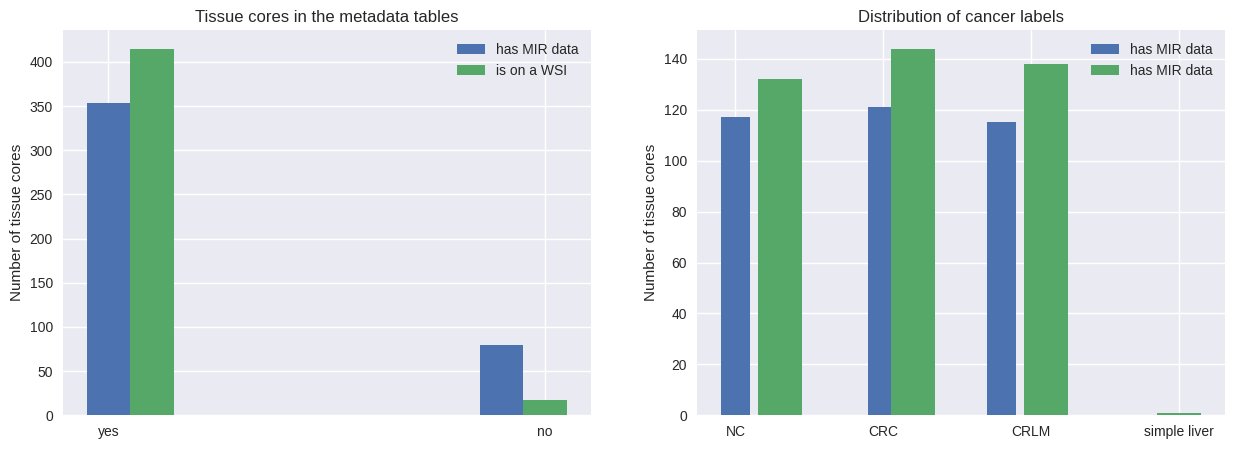

In [3]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.hist(df["has_MIR"], align = "left", label = 'has MIR data')
plt.hist(df["on_WSI"], align = "right", label = 'is on a WSI')
plt.title("Tissue cores in the metadata tables")
plt.ylabel("Number of tissue cores")
plt.legend()

plt.subplot(1,2,2)
plt.hist(df[df["has_MIR"] == "yes"]["cancer"], align = "left", label = 'has MIR data')
plt.hist(df[df["on_WSI"] == "yes"]["cancer"], align = "right", label = 'has MIR data')
plt.title("Distribution of cancer labels")
plt.ylabel("Number of tissue cores")
plt.legend()
plt.show()

In [4]:
# Number of tissue cores and number of patients in the entire MIR dataset
print(df[(df["on_WSI"] == "yes") & (df["cancer"] == "NC")]["cancer"].count())
print(df[(df["on_WSI"] == "yes") & (df["cancer"] == "CRC")]["cancer"].count())
print(df[(df["on_WSI"] == "yes") & (df["cancer"] == "CRLM")]["cancer"].count())
print(len(df[df["on_WSI"] == "yes"]["patient"].value_counts()))

132
144
138
130


In [5]:
# Number of tissue cores and number of patients in the entire WSI dataset
print(df[(df["has_MIR"] == "yes") & (df["cancer"] == "NC")]["cancer"].count())
print(df[(df["has_MIR"] == "yes") & (df["cancer"] == "CRC")]["cancer"].count())
print(df[(df["has_MIR"] == "yes") & (df["cancer"] == "CRLM")]["cancer"].count())
print(len(df[df["has_MIR"] == "yes"]["patient"].value_counts()))

117
121
115
124


In [6]:
# Tissue core and patient distribution across the 9 TMAs in the MIR dataset

cancers = ["NC", "CRC", "CRLM"]
for j in cancers:
    print(f"{j}:")
    for i in range(1,10):
        print("   ", df[(df["has_MIR"] == "yes") & (df["cancer"] == j) & (df["tma"] == i)]["cancer"].count())

print("Patients:")
for i in range(1,10):
    print("   ", len(df[(df["has_MIR"] == "yes") & (df["tma"] == i)]["patient"].value_counts()))

NC:
    13
    12
    6
    14
    16
    16
    16
    14
    10
CRC:
    13
    14
    11
    11
    15
    15
    14
    15
    13
CRLM:
    12
    15
    13
    15
    15
    15
    8
    14
    8
Patients:
    15
    16
    15
    16
    17
    13
    8
    8
    17


In [7]:
# Tissue core and patient distribution across the 9 TMAs in the WSI dataset

for j in cancers:
    print(f"{j}:")
    for i in range(1,10):
        print("   ", df[(df["on_WSI"] == "yes") & (df["cancer"] == j) & (df["tma"] == i)]["cancer"].count())
        
print("Patients:")
for i in range(1,10):
    print("   ", len(df[(df["on_WSI"] == "yes") & (df["tma"] == i)]["patient"].value_counts()))

NC:
    15
    14
    11
    16
    16
    16
    16
    14
    14
CRC:
    16
    16
    13
    15
    16
    16
    16
    18
    18
CRLM:
    15
    16
    14
    16
    15
    16
    15
    16
    15
Patients:
    16
    16
    16
    16
    17
    13
    8
    8
    21


/home/borbende/anaconda3/lib/python3.11/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


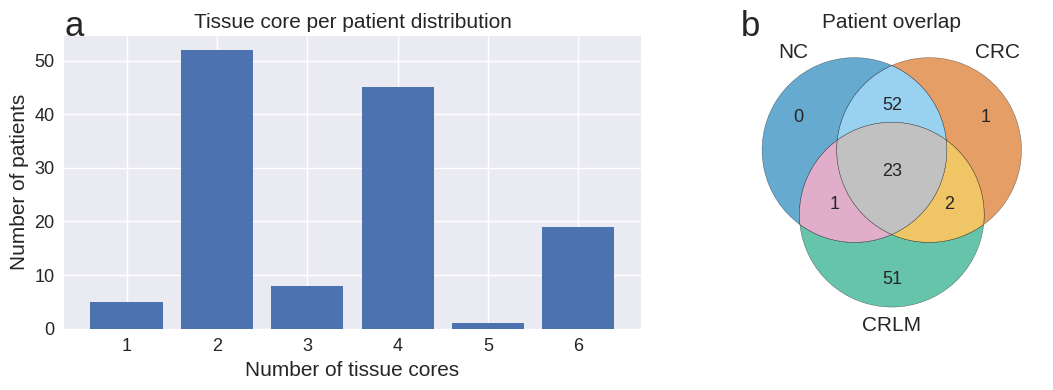

In [80]:
plt.figure(figsize=(12, 4))


title_fs = 15
label_fs = 15
tick_fs = 13

plt.subplot(1,2,1)

core_counts = df["patient"].value_counts()
patient_distribution = core_counts.value_counts().sort_index()

plt.bar(patient_distribution.index, patient_distribution)
plt.xlabel("Number of tissue cores", fontsize = label_fs)
plt.ylabel("Number of patients", fontsize = label_fs)
plt.xticks(fontsize = tick_fs)
plt.yticks(fontsize = tick_fs)
plt.title("Tissue core per patient distribution", fontsize = title_fs)

plt.text(0.0001, 0.9999, "a", transform=plt.gca().transAxes, fontsize=25)

plt.subplot(1,2,2)

patients_NC = set(df.loc[df["cancer"] == "NC", "patient"])
patients_CRC = set(df.loc[df["cancer"] == "CRC", "patient"])
patients_CRLM = set(df.loc[df["cancer"] == "CRLM", "patient"])

v = venn3_unweighted(
    [patients_NC, patients_CRC, patients_CRLM],
    set_labels=("NC", "CRC", "CRLM")
)

# Control set label fonts (NC, CRC, CRLM)
for text in v.set_labels:
    if text:
        text.set_fontsize(label_fs)

# Control subset number fonts
for text in v.subset_labels:
    if text:
        text.set_fontsize(tick_fs)

# Control circle colors
color_map = {
    "100": "#0072B2",  # NC only        blue
    "010": "#D55E00",  # CRC only       vermillion
    "001": "#009E73",  # CRLM only      bluish green

    "110": "#56B4E9",  # NC & CRC       light blue
    "101": "#CC79A7",  # NC & CRLM      reddish purple
    "011": "#E69F00",  # CRC & CRLM     orange

    "111": "#999999",  # NC & CRC & CRLM neutral gray
}

for region_id, color in color_map.items():
    patch = v.get_patch_by_id(region_id)
    if patch:
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
        patch.set_edgecolor("black")

plt.title("Patient overlap", fontsize = title_fs)

plt.text(0.0001, 0.9999, "b", transform=plt.gca().transAxes, fontsize=25)

plt.tight_layout()
plt.savefig("patient_venn.pdf")
plt.show()